<h1><center>Pandas Exercise</center></h1>

## Facts about Heart Disease

Heart disease is the leading cause of death in the United States, causing about 1 in 4 deaths. Although heart disease is sometimes thought of as a “man’s disease,” around the same number of women and men die each year of heart disease in the United States. Despite increases in awareness over the past decade, only 54% of women recognize that heart disease is their number 1 killer. While one in 31 American women dies from breast cancer each year, heart disease is the cause of one out of every three female deaths. That’s roughly one death each minute. Fewer women than men survive their first heart attack. 90% of women have one or more risk factors for developing heart disease or stroke.
80% of heart disease and stroke events may be prevented by lifestyle changes and education.


## Dataset

The original dataset contains 76 attributes, but all published experiments refer to using a subset of 14 of them.

Attribute Information:

- age
- sex
    - 0: Female
    - 1: Male
- chest pain type (4 values)
    - 0: Typical Angina
    - 1: Atypical Angina
    - 2: Non-Anginal Pain
    - 3: Asymptomatic
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
    - 0: Less Than 120mg/ml
    - 1: Greater Than 120mg/ml
- resting electrocardiographic results (values 0,1,2)
    - 0: Normal
    - 1: ST-T Wave Abnormality
    - 2: Left Ventricular Hypertrophy
- maximum heart rate achieved
- exercise induced angina
    - 1: Yes
    - 0: No
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
    - 0: Upsloping
    - 1: Flat
    - 2: Downsloping
- number of major vessels (0-3) colored by flourosopy
- thalassemia
    - 0, 1: Normal
    - 2: Fixed Defect
    - 3: Reversable Defect
- disease: Whether has heart disease
    - 0: No heart disease
    - 1: Has heart disease

## Section 1: Data Loading and Data Preparation
#### Import all necessary libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Download the data from the given URL to your computer and load the file in as a DataFrame named `data`. 

Data URL: [click here](https://github.com/BlueJayADAL/CS121/blob/main/datasets/heart.xlsx)

In [38]:
data = pd.read_excel('heart.xlsx', sheet_name = 'Sheet1')


#### Show the first 5 rows

In [39]:
data.head()


,Age,Sex,Chest_Pain,Resting_BP,Cholestoral,Fasting_BS,Resting_ECG,Max_Heart_Rate,Excs_Angina,Oldpeak,Slope,Num_Vessels,Thalassemia,Disease
0,63,Male,Asymptomatic,145,233.0,> 120mg/ml,Normal,150,No,2.3,Upsloping,0,1,Has Disease
1,37,Male,Non_Anginal Pain,130,250.0,< 120mg/ml,ST-T Wave Abnormality,187,No,3.5,Upsloping,0,2,Has Disease
2,41,Female,Atypical Angina,130,204.0,< 120mg/ml,Normal,172,No,1.4,Downsloping,0,2,Has Disease
3,56,Male,Atypical Angina,120,236.0,< 120mg/ml,ST-T Wave Abnormality,178,No,0.8,Downsloping,0,2,Has Disease
4,57,Female,Typical Angina,120,354.0,< 120mg/ml,ST-T Wave Abnormality,163,Yes,0.6,Downsloping,0,2,Has Disease


#### Show all the column names

In [40]:
data.columns


Index(['Age', 'Sex', 'Chest_Pain', 'Resting_BP', 'Cholestoral', 'Fasting_BS',
       'Resting_ECG', 'Max_Heart_Rate', 'Excs_Angina', 'Oldpeak', 'Slope',
       'Num_Vessels', 'Thalassemia', 'Disease'],
      dtype='object')

#### Show the basic information of the DataFrame

In [41]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             303 non-null    int64  
 1   Sex             303 non-null    object 
 2   Chest_Pain      303 non-null    object 
 3   Resting_BP      303 non-null    int64  
 4   Cholestoral     286 non-null    float64
 5   Fasting_BS      303 non-null    object 
 6   Resting_ECG     303 non-null    object 
 7   Max_Heart_Rate  303 non-null    int64  
 8   Excs_Angina     303 non-null    object 
 9   Oldpeak         303 non-null    float64
 10  Slope           303 non-null    object 
 11  Num_Vessels     303 non-null    int64  
 12  Thalassemia     303 non-null    int64  
 13  Disease         303 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 33.3+ KB


#### Show the basic statistics of the DataFrame

In [42]:
data.describe()



,Age,Resting_BP,Cholestoral,Max_Heart_Rate,Oldpeak,Num_Vessels,Thalassemia
count,303.000000,303.000000,286.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,247.867133,149.646865,1.039604,0.729373,2.313531
std,9.082101,17.538143,52.565513,22.905161,1.161075,1.022606,0.612277
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,2.000000
50%,55.000000,130.000000,243.500000,153.000000,0.800000,0.000000,2.000000
75%,61.000000,140.000000,277.000000,166.000000,1.600000,1.000000,3.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,3.000000



#### Checkout the missing data for each column

In [43]:
data.isnull().sum()



Age                0
Sex                0
Chest_Pain         0
Resting_BP         0
Cholestoral       17
Fasting_BS         0
Resting_ECG        0
Max_Heart_Rate     0
Excs_Angina        0
Oldpeak            0
Slope              0
Num_Vessels        0
Thalassemia        0
Disease            0
dtype: int64

#### Impute the missing values with the average number from that column. Ensure the change is `inplace`.

In [45]:
avg_cholestoral = data['Cholestoral'].mean()

data['Cholestoral'].fillna(value = avg_cholestoral, inplace = True)


In [46]:
# Check the missing data again to see if we fixed it

data.isnull().sum()


Age               0
Sex               0
Chest_Pain        0
Resting_BP        0
Cholestoral       0
Fasting_BS        0
Resting_ECG       0
Max_Heart_Rate    0
Excs_Angina       0
Oldpeak           0
Slope             0
Num_Vessels       0
Thalassemia       0
Disease           0
dtype: int64

#### Find and count for each unique severity level of `Thalassemia`

In [47]:
data['Thalassemia'].value_counts()



2    166
3    117
1     18
0      2
Name: Thalassemia, dtype: int64


#### Define a function `thal_convert()` to convert the numeric thalassemia severity into their corresponding descriptive meanings. For example, 0, 1 means 'Normal', 2 means 'Fixed Defect', and 3 means 'Reversable Defect'. 

In [48]:
# Define the function

def thal_convert(num):
    """
    - 0, 1: Normal
    - 2: Fixed Defect
    - 3: Reversable Defect
    """
    if num == 0 or num == 1:
        return 'Normal'
    elif num == 2:
        return 'Fixed Defect'
    elif num == 3:
        return 'Reversible Defect'
    

In [49]:
# Convert the numeric 'Thalassemia' column into descriptive meanings

data['Thalassemia'] = data['Thalassemia'].apply(thal_convert)


In [50]:
# Check the symptoms again

data['Thalassemia'].value_counts()


Fixed Defect         166
Reversible Defect    117
Normal                20
Name: Thalassemia, dtype: int64

## Section 2: Data Visualization
#### Show a bar graph of the count of Male versus Female.

<AxesSubplot:xlabel='Sex', ylabel='count'>

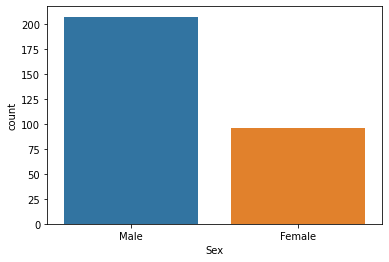

In [66]:
sns.countplot(data = data, x = 'Sex')



#### Show a bar graph of the count of all possible chest pain types

<AxesSubplot:xlabel='Chest_Pain', ylabel='count'>

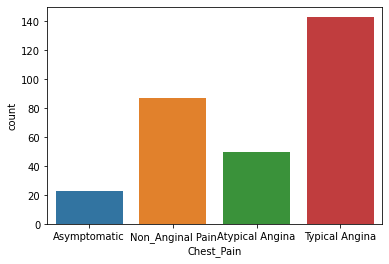

In [65]:
sns.countplot(data = data, x = 'Chest_Pain')




#### Show the age distribution based off of each gender with 50 bins

<AxesSubplot:xlabel='Age', ylabel='Count'>

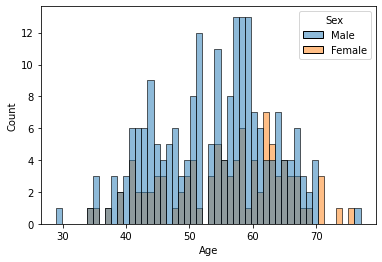

In [69]:
sns.histplot(data = data, x = 'Age', bins = 50, hue = "Sex")



#### Show the `Cholestoral` level distribution based off of `Disease`. Use `frequency` for the y-axis.

<AxesSubplot:xlabel='Cholestoral', ylabel='Frequency'>

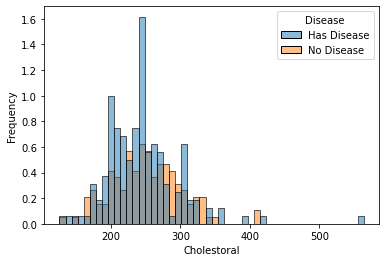

In [75]:
sns.histplot(data = data, x = 'Cholestoral', stat = 'frequency', bins = 50, hue = "Disease")





#### Show a scatter plot of `Age` versus `Cholestoral`. Then use `Disease` as the third dimensionality to color-code. Use both Seaborn and Panda's built-in visualization to generate two similar graphs.

In [77]:
# Transform the "Disease" column into 
# a new numeric column named "Disease_num",
# where 0 means "No Disease" and 1 means "Has Disease"
def conv_disease(disease_str):
    if disease_str == 'No Disease':
        return 0
    else:
        return 1


In [78]:
data['Disease_num'] = data['Disease'].apply(conv_disease)

<AxesSubplot:xlabel='Age', ylabel='Cholestoral'>

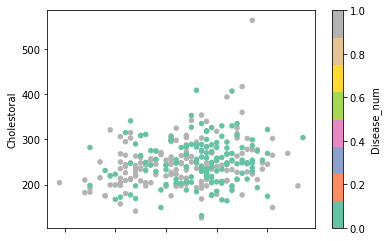

In [84]:
# Plot the graph using Pandas plot
data.plot(kind = 'scatter', x = 'Age', y = 'Cholestoral', c = 'Disease_num', cmap = 'Set2')


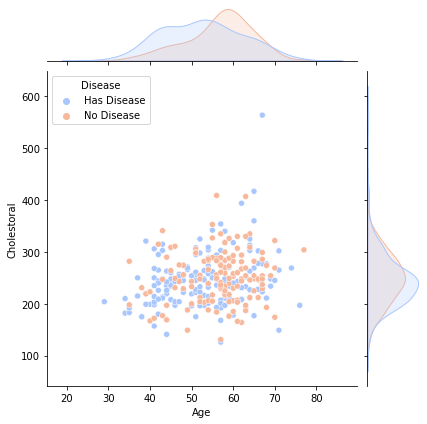

In [76]:
# Plot with Seaborn
sns.jointplot(data = data, x = 'Age', y = 'Cholestoral', hue = 'Disease', palette = 'coolwarm')



#### Show a pairwise plot of all numeric columns from the DataFrame. Use the `Disease` column as another dimensionality.

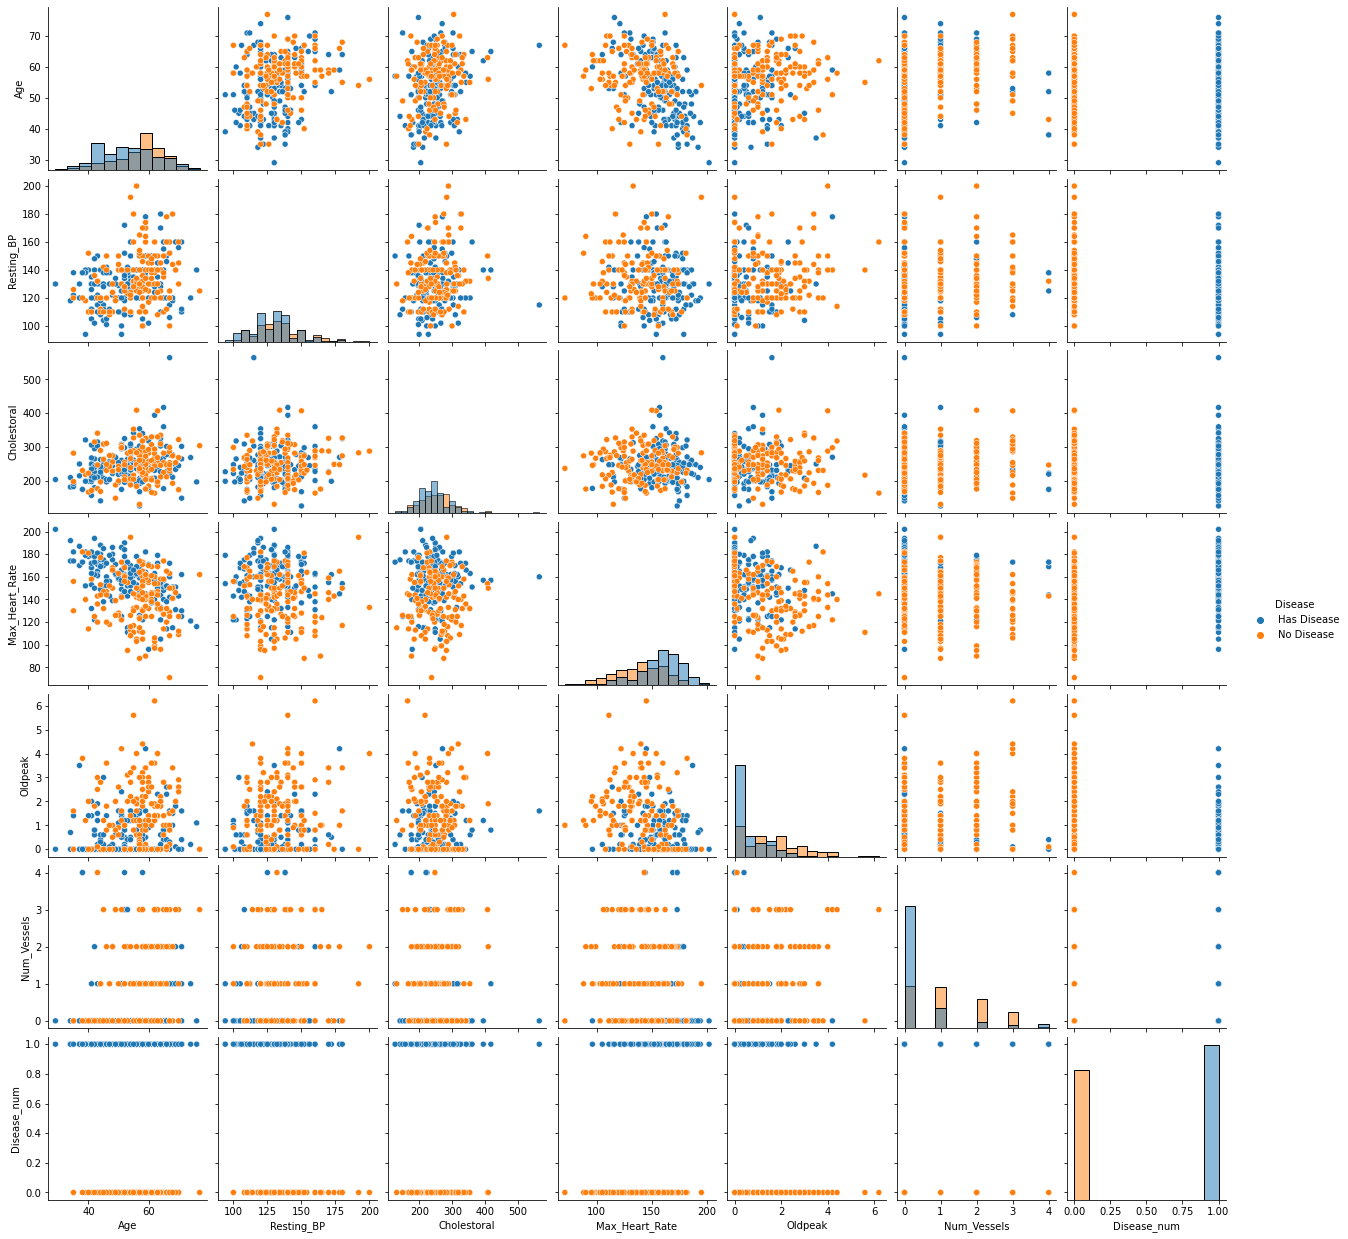

In [88]:
sns.pairplot(data = data, hue = 'Disease', diag_kind = 'hist')

##use list of columns after data if asked in question##

#### What are your observations from the plot?


Answer: max heart rate is the best indicator of heart disease because the colors are more separated than the other rows/columns


#### Show a boxplot of resting blood pressure for each resting ECG type using Seaborn.

<AxesSubplot:xlabel='Resting_ECG', ylabel='Resting_BP'>

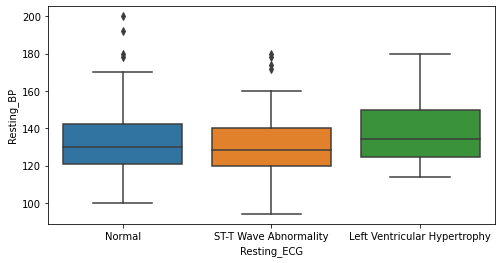

In [90]:
plt.figure(figsize=(8, 4))

sns.boxplot(data = data, x = 'Resting_ECG', y = 'Resting_BP')


#### Show a violin plot of resting blood pressure for each thalassemia severity. Then break down the graph based off of whether having heart diseases.

<AxesSubplot:xlabel='Thalassemia', ylabel='Resting_BP'>

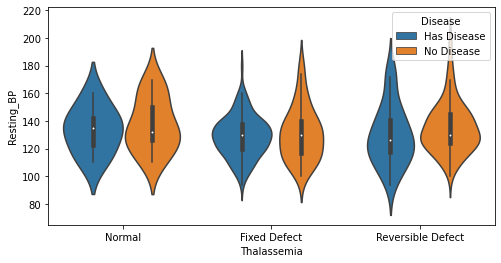

In [91]:
plt.figure(figsize=(8, 4))

sns.violinplot(data = data, x = 'Thalassemia', y = 'Resting_BP', hue = 'Disease')


#### Change the violin plot into a different view with `split` set to `True`

<AxesSubplot:xlabel='Thalassemia', ylabel='Resting_BP'>

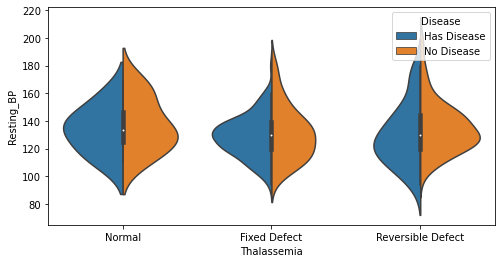

In [92]:
plt.figure(figsize=(8, 4))

sns.violinplot(data = data, x = 'Thalassemia', y = 'Resting_BP', hue = 'Disease', split = True)


#### Use a heatmap to show the pairwise correlation among all numeric columns from the DataFrame

<AxesSubplot:>

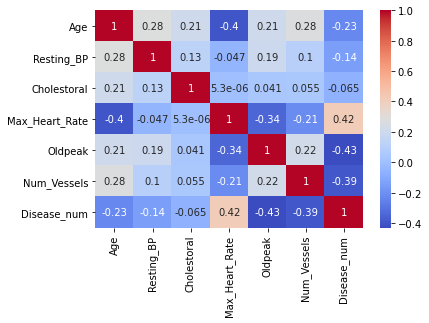

In [93]:
sns.heatmap(data = data.corr(), annot = True, cmap = 'coolwarm')



#### Use a pie chart to show the proportional breakdown of `Num_Vessels` (number of major vessels colored by flourosopy)

<AxesSubplot:ylabel='Num_Vessels'>

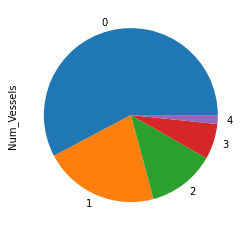

In [94]:
data['Num_Vessels'].value_counts().plot(kind = 'pie')
